In [2]:
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 28.0 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115442 sha256=26c039d82b98511a12e5b7bdcf891926a447dbc858ce2a512795ad1a2fea1c8e
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
train_images=(np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
test_images=(np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
train_labels =train_labels.astype(np.int64)
test_labels =test_labels.astype(np.int64)

In [8]:
num_classes=train_labels.max() + train_labels.min()+1

In [9]:
num_classes

10

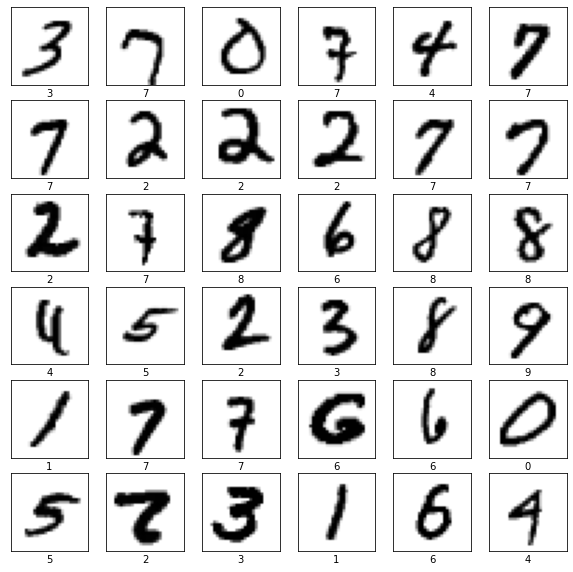

In [10]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [43]:
def CNN_model():
  cnn_model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(8,(5,5),activation="relu",input_shape=(28,28,1)),

      tf.keras.layers.MaxPool2D((2,2)),

      tf.keras.layers.Conv2D(16,(5,5),activation="relu"),

      tf.keras.layers.MaxPool2D((2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10,activation =tf.nn.softmax)])

  return cnn_model


  
cnn = CNN_model()

In [37]:
train_images[0].reshape(-1,28,28,1).shape

(1, 28, 28, 1)

In [46]:
cnn_predict = cnn.predict(train_images[0].reshape(-1,28,28,1))

1/1 [==============================] - 0s 54ms/step


In [26]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  208       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  3216      
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  3

In [44]:
cnn.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1) , loss= 'categorical_crossentropy' ,metrics=['accuracy'])


In [45]:
BATCH_SIZE = 64
EPOCHS = 5

cnn.fit(train_images,train_labels,batch_size=BATCH_SIZE, epochs= EPOCHS)

Epoch 1/5


ValueError: ignored